## Setup, Imports, Path &  Import Scraper & Preprocessor Modules

In [1]:
import os
import sys
from matplotlib import pyplot as plt
import seaborn as sns


# Step 1: Move to project root if inside notebooks/
current_dir = os.getcwd()
if os.path.basename(current_dir).lower() == "notebooks":
    project_root = os.path.dirname(current_dir)
    os.chdir(project_root)
    print(f"Changed working directory to project root: {project_root}")
else:
    project_root = current_dir

# Step 2: Ensure src is in sys.path
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)
    print(f"Added src to sys.path: {src_path}")

# Step 3: Import modules directly from their packages
try:
    from scraper.scraper import main as run_scraper
    from preprocessing.preprocessing import ReviewPreprocessor
    print("✔ Imports successful")
except ImportError as e:
    print("❌ Import error:", e)


Changed working directory to project root: c:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml
Added src to sys.path: c:\Users\hp\Desktop\AI projects\fintech-customer-analytics-ml\src
✔ Imports successful


## Run Scraper (same flow as your demo)

In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3197813
Total Ratings: 38875
Total Reviews: 8337

Dashen Bank: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.1581507
Total Ratings: 3917
Total Reviews: 778

Abyssinia Bank: Abyssinia Bank
App ID: com.boa.boaMobileBanking
Current Rating: 4.170047
Total Ratings: 6370
Total Reviews: 1221

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:07,  3.94s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks:  67%|██████▋   | 2/3 [00:07<00:03,  3.75s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Abyssinia Bank


Banks: 100%|██████████| 3/3 [00:11<00:00,  3.86s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400
  Abyssinia Bank: 400

Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 17:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very smart App easy to use and friendly...
Date: 2025-11-29 16:22:04

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 2025-11-29 02:45:26

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-29 00:38:53

Abyssinia Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## Run Preprocessing

Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...
Removed 0 rows with missing critical values

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...
Removed 0 reviews with empty text

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

Generating simple dashboard...

✅ Preprocessing finished successfully!


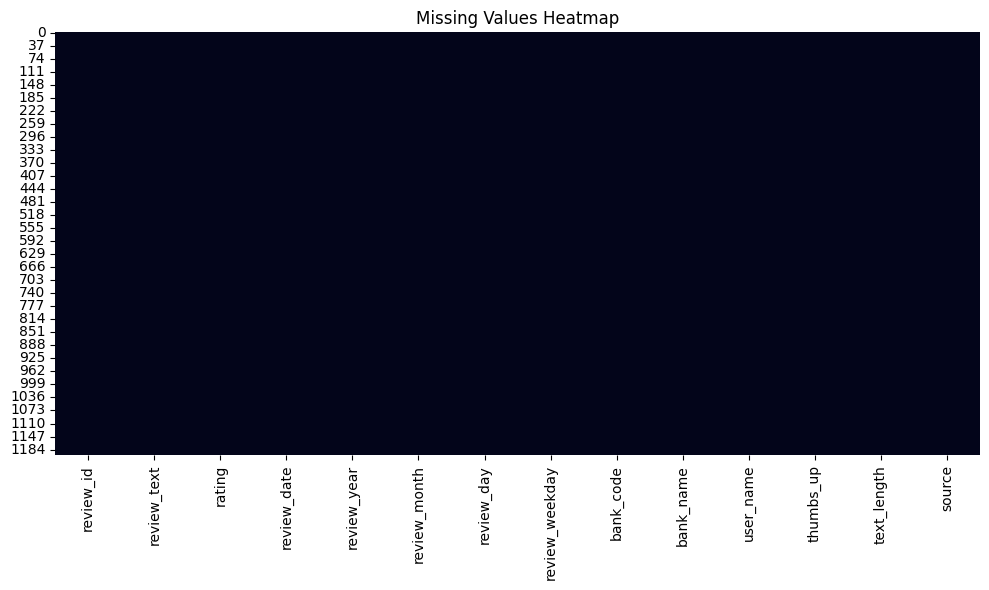

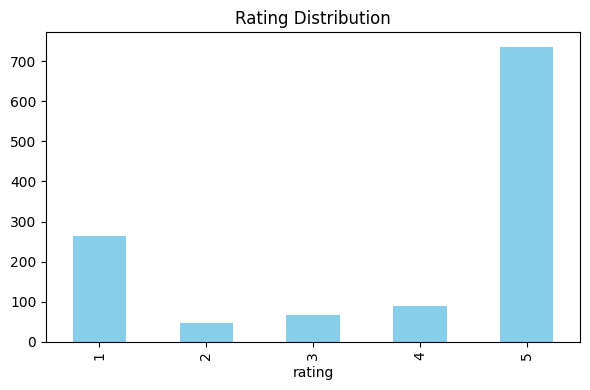

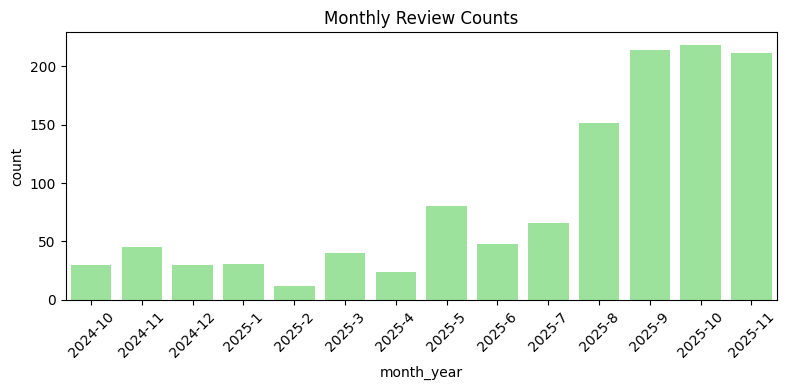

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

## 3. Visualizations

C:\Users\hp\AppData\Local\Temp\ipykernel_19352\36714876.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_19352\36714876.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


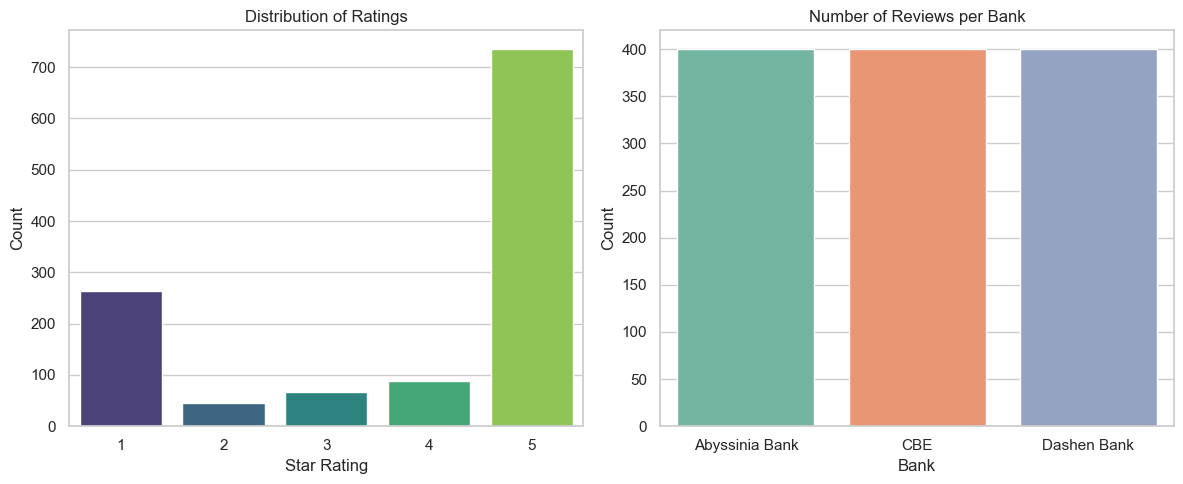

In [4]:
# Set plot style



sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

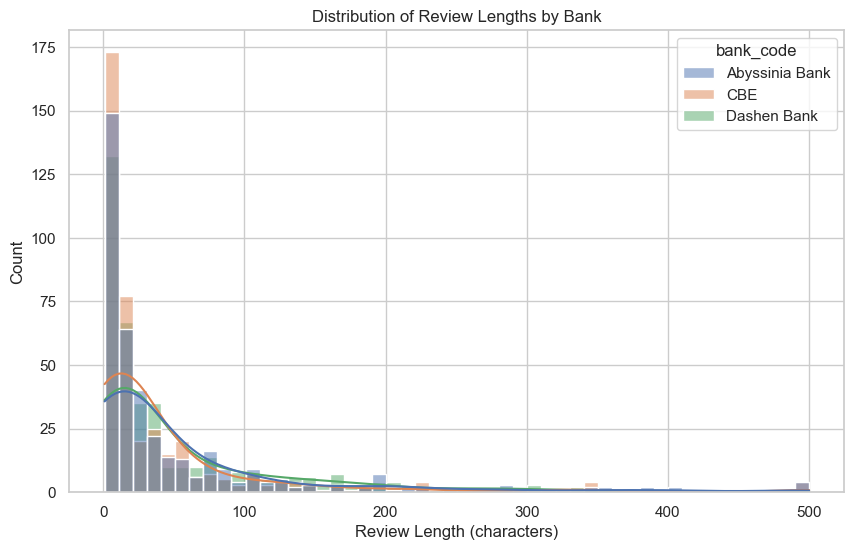

In [42]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()